### <h1>Custom Implementation of KNN Algorithm</h1> <br>

The first section is implementation of KNN Algorithm with generalised value of K.<br>
So we can use that for k=1, 3, N.

The second section is just 1-NN implementation

In this project we explore 2 datasets:<br>
1. IRIS dataset<br>
2. ionosphere dataset<br>

Tasks performed for each dataset are as follows :
1. Loading the datasets
2. Exploring the datasets
3. Implementing K Nearest Neighbor on both datasets
4. Implementing Nearest Neighbor on both datasets

Additionally, I have added my comments with respect to different observations made while performing the above tasks

<b>Note : </b>Please replace the path of the ionosphere.txt while loading the dataset (section 2.1 and in 1NN implementation)

<h1>1. Iris Dataset</h1>

<h2>1.1 Importing the IRIS Dataset</h2>

In [1]:
# import required packages to 
# load iris dataset : the dataset on which we want to implement KNN
from sklearn.datasets import load_iris
iris_db = load_iris()
import math

<h2>1.2 Exploring the IRIS dataset</h2>

In [2]:
print(type(iris_db))
print(type(iris_db['data']))
print(iris_db['data'].shape)

<class 'sklearn.utils.Bunch'>
<class 'numpy.ndarray'>
(150, 4)


We can see in the above output we can observe the types of different data that we will be using in our next steps.<br>
Next we will have a quick look at the the keys and the data present in each value of the key

In [3]:
print(iris_db.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [4]:
print(iris_db['target'])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


Above we can see the value for the target key. These are basically the indexes which map to the predicted labels

In [5]:
print(iris_db['target_names'])

['setosa' 'versicolor' 'virginica']


In [6]:
print(iris_db['feature_names'])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


<h3>1.3 Loading the Features and the Labels</h3>

In [7]:
features = iris_db['data']
labels = iris_db['target']
print(type(features))
print(type(labels))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


Since the number of features are small in the iris dataset we can afford to visually plot each feature with every other feature and check that which feature combination will be best for classification

<h3>1.4 Plotting the dataset for visual analysis</h3>
Here we will try to plot a simple scatter plot of the features of the dataset to get an understanding that which features give us the best classifiication of the different species of the iris flower

In [8]:
def scatter_plot(i, j, x, y, labels, title):
    import matplotlib.pyplot as plt
    fig = plt.figure(figsize=(3, 3))
    ax = fig.add_subplot()
    ax.scatter(x,y,c=labels)
    ax.set_xlabel(i)
    ax.set_ylabel(j)

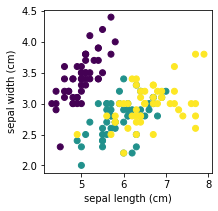

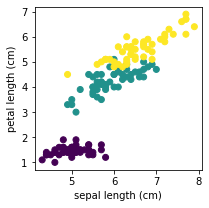

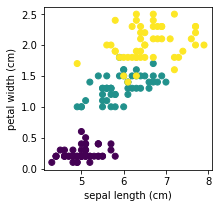

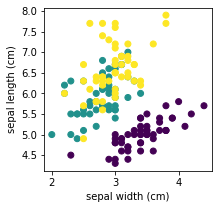

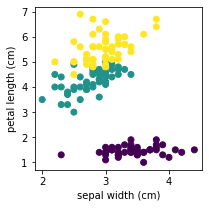

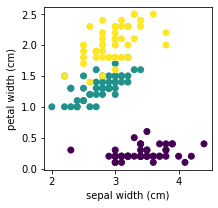

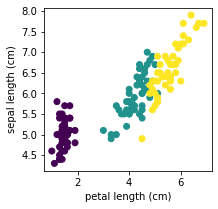

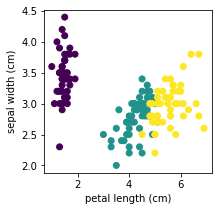

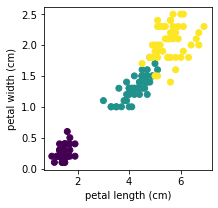

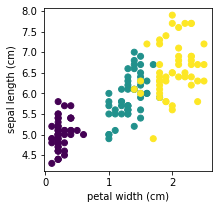

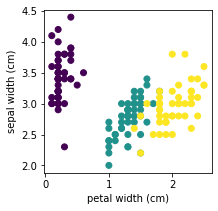

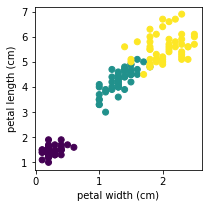

In [9]:
for i in range(4):
    for j in range(4):
        if i != j:
            scatter_plot(iris_db["feature_names"][i],iris_db["feature_names"][j], features[:,i], features[:,j], labels, "This graph is of {} vs {}".format(iris_db['feature_names'][i], iris_db['feature_names'][j]))

From the aboves graphs we can draw some observations :
Graph of 
1. Sepal length x petal length
2. petal_width x petal length 
3. petal length x petal width

Show good distinction of each category of the flower.
Basically the clusters are more concentrated, which is helpful while making prediction about the new input data.

<h1>2. Ionosphere Dataset </h1>

<h2>2.1 Importing the Ionosphere Dataset</h2>
Note : Please replace the path of the ionosphere.txt

In [10]:
import numpy as np

ionosphere_path = "/path/to/file/ionosphere.txt"
ion_all_cols = np.genfromtxt(ionosphere_path, delimiter = ",", usecols = np.arange(35))

<h2>1.2 Exploring the Ionosphere dataset</h2>

In [11]:
print(type(ion_all_cols))

<class 'numpy.ndarray'>


In [12]:
#Let's print the first 5 rows of the dataset and see
print(ion_all_cols[:5])

[[ 1.       0.       0.99539 -0.05889  0.85243  0.02306  0.83398 -0.37708
   1.       0.0376   0.85243 -0.17755  0.59755 -0.44945  0.60536 -0.38223
   0.84356 -0.38542  0.58212 -0.32192  0.56971 -0.29674  0.36946 -0.47357
   0.56811 -0.51171  0.41078 -0.46168  0.21266 -0.3409   0.42267 -0.54487
   0.18641 -0.453    1.     ]
 [ 1.       0.       1.      -0.18829  0.93035 -0.36156 -0.10868 -0.93597
   1.      -0.04549  0.50874 -0.67743  0.34432 -0.69707 -0.51685 -0.97515
   0.05499 -0.62237  0.33109 -1.      -0.13151 -0.453   -0.18056 -0.35734
  -0.20332 -0.26569 -0.20468 -0.18401 -0.1904  -0.11593 -0.16626 -0.06288
  -0.13738 -0.02447 -1.     ]
 [ 1.       0.       1.      -0.03365  1.       0.00485  1.      -0.12062
   0.88965  0.01198  0.73082  0.05346  0.85443  0.00827  0.54591  0.00299
   0.83775 -0.13644  0.75535 -0.0854   0.70887 -0.27502  0.43385 -0.12062
   0.57528 -0.4022   0.58984 -0.22145  0.431   -0.17365  0.60436 -0.2418
   0.56045 -0.38238  1.     ]
 [ 1.       0.       1.

As we can see in the above output that all the columns have quantitave data.
From the dataset definition, we know that the last column of the dataset is the label and all other columns are feature columns<br>
Unlike the Iris dataset, here we have the features, labels, etc present all in one numpy array only, as we have loaded it directly from a txt file stored on our local machine

<h3>1.2.1 Checking for NaN values in each column</h3>

In [13]:
cols_check = []
for i in range(35):
    # We calculate the sum of each column. If a column 
    # has even one NaN value then the sum will be NaN.
    col_sum = np.sum(ion_all_cols[i])
    cols_check.append(np.isnan(col_sum))
print(cols_check)

[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]


In the above output we can see that all the columns return False for the NaN check.<br>
So we can say that there are no missing values in the dataset

<h3>1.2.2 Exploring the stats of each Column</h3>

In [14]:
# We import stats from scipy package to get a brief idea of all the columns that we have in our dataset
from scipy import stats
# We run the stats.describe with axis 1 tp run it on all the columns
ion_data_stats = stats.describe(ion_all_cols[:34], axis = 1)
print(ion_data_stats)
# We get an object in return which basically gives us different stats metrics on a columns level.

DescribeResult(nobs=35, minmax=(array([-0.54487, -1.     , -0.4022 , -1.     , -0.65697, -1.     ,
       -0.8251 , -1.     , -0.7342 , -1.     , -0.89158, -1.     ,
       -0.68794, -1.     , -0.05563, -1.     , -0.01236, -1.     ,
        0.     , -1.     , -0.46866, -1.     , -0.07905, -1.     ,
       -0.39487, -1.     , -1.     , -1.     , -0.13308, -1.     ,
       -0.84437, -1.     , -0.59854, -1.     ]), array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])), mean=array([ 0.19223629, -0.13248   ,  0.32588229,  0.18468629,  0.08690971,
       -0.01165943,  0.01042714,  0.08571429,  0.19222343,  0.00912457,
        0.117388  ,  0.28980057,  0.27435457,  0.38835429,  0.62032714,
        0.00597429,  0.501266  , -0.08571429,  0.39851229,  0.30982143,
        0.34365971, -0.14285714,  0.39616343,  0.08571429,  0.35564143,
        0.05572114,  0.12540629, -0.18214286,  0.79886457, -0.0285

<h3>Let's explore at a granular level</h3>

In [15]:
print("The total number of columns : {}".format(ion_data_stats.nobs))

The total number of columns : 35


In [16]:
print("The minimum and maximum values of each of the colums\n")
print("Minimum Values : {}\n".format(ion_data_stats.minmax[0]))
print("Maximum Values : {}".format(ion_data_stats.minmax[1]))

The minimum and maximum values of each of the colums

Minimum Values : [-0.54487 -1.      -0.4022  -1.      -0.65697 -1.      -0.8251  -1.
 -0.7342  -1.      -0.89158 -1.      -0.68794 -1.      -0.05563 -1.
 -0.01236 -1.       0.      -1.      -0.46866 -1.      -0.07905 -1.
 -0.39487 -1.      -1.      -1.      -0.13308 -1.      -0.84437 -1.
 -0.59854 -1.     ]

Maximum Values : [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


Here we can see that all the columns have values between -1 and 1.

In [17]:
print("Mean of a each column : \n{}\n".format(ion_data_stats.mean))
print("Variance of each column : \n{}".format(ion_data_stats.variance))

Mean of a each column : 
[ 0.19223629 -0.13248     0.32588229  0.18468629  0.08690971 -0.01165943
  0.01042714  0.08571429  0.19222343  0.00912457  0.117388    0.28980057
  0.27435457  0.38835429  0.62032714  0.00597429  0.501266   -0.08571429
  0.39851229  0.30982143  0.34365971 -0.14285714  0.39616343  0.08571429
  0.35564143  0.05572114  0.12540629 -0.18214286  0.79886457 -0.02857143
  0.328776    0.38098171  0.21535457  0.21490743]

Variance of each column : 
[0.2945995  0.29467176 0.22718423 0.4727105  0.26064643 0.06329639
 0.43239571 0.43361345 0.46808771 0.10658888 0.54088502 0.7699348
 0.43753325 0.49389072 0.16923916 0.40661716 0.17186053 0.90420168
 0.0781943  0.66098181 0.38423123 0.59663866 0.17579333 0.61008403
 0.29320865 0.95941116 0.52305974 0.55821954 0.1035819  0.91092437
 0.51943367 0.743499   0.35654432 0.42098403]


We can observe that the variance of each column is very close to 0. Infact, none of them have a variance more than 1, so we can say that all the values are belonging in a very compact range.<br>
Also, we can say that none of the columns have a range which is remarkably different than the other columns as their mean belong to the same range, -1 to 1. 
This is in line with min max values in the above cells as all the values are between -1 and 1.
Hence there will no need to regularize any of the values to match with other columns

<h3>3. Splitting the dataset</h3>
<br>
We use the <b>train_test_split</b> function which helps to split the dataset into training and testing splits as per industry standards i.e. 75% training and 25% testing

In [18]:
def split_dataset(features, labels, rs):
    """
    This function is responsible for splitting the data into training
    and testing sets. It uses the train_test_split function from sklearn
    package. It accepts the features and labels and returns training and 
    testing  sets for samples and labels.
    
    Parameters
    ----------
    features : numpy.ndarray
        This a numpy array of all the features made from iris_db['data'].
    labels : numpy.ndarray
        This a numpy array of all the features made from iris_db['target'].
    rs : int
        This an arbitrary integer value to set the seed at a fixed point to
        get identical split results every time we run it.

    Returns
    -------
    Returns 4 parameters viz. x_train, y_train, x_test, y_test
    These are splits of the dataset as per industry standards(75% training, 
    25% testing) for training and testing sets.
    """
    from sklearn.model_selection import train_test_split
    return(train_test_split(features, labels, random_state = rs))

<h4>3.1 Splitting IRIS Dataset</h4>

In [19]:
x_train, x_test, y_train, y_test = split_dataset(features, labels, 311)

In [20]:
# Let's have a quick look at the training samples and labels
print("x_train :\n",x_train[:5])
print("y_train :\n",y_train[:5])

x_train :
 [[5.4 3.4 1.5 0.4]
 [6.  2.9 4.5 1.5]
 [5.4 3.9 1.3 0.4]
 [4.7 3.2 1.3 0.2]
 [5.5 2.3 4.  1.3]]
y_train :
 [0 1 0 0 1]


<h4>3.2 Splitting the Ionosphere Dataset</h4>

In [21]:
features_ion = np.genfromtxt(ionosphere_path, delimiter = ",", usecols = np.arange(34))
labels_ion = np.genfromtxt(ionosphere_path, delimiter = ",", usecols = 34, dtype = 'int')
xi_train, xi_test, yi_train, yi_test = split_dataset(features_ion, labels_ion, 311)

<h3>4. Helper Funtions</h3>

In [22]:
def calc_distance(test_sample, x_train):
    """
    This function is responsible for calculating the distance of the test
    sample with all the training samples and returns a list of it
    
    Input
    train_sample : one of the test sample
    x_train : entire training set
    
    Returns: list
    A list of dstances of each training sample from the test sample
    """
    import math
    distance =[]
    for train_sample in x_train:
        _distance = 0
        for i in range(len(test_sample)):
            _distance += (test_sample[i]-train_sample[i])**2
        distance.append(math.sqrt(_distance))
    return distance

In [23]:
def find_index_min_distance(distance, n_neighbors):
    """
    This function accepts the list of distances of a single test sample 
    with all other training samples and the number of neighbors that we 
    need to consider and returns a list of indices of n shortest distances
    
    Parameters
    ----------
    distance : int
        A list of distances of each training sample from the test sample
        
    n_neighbors : int
        This is the number of nearest neighbors we want to consider 
        to predict the label of the test sample
    
    Returns
    -------
    _min_index_list : list
        It is a list of indexes which have the least n neighbors distance
    """
    import math
    import numpy as np

    _min_index_dict = {}
    _min_index_list = []
    for i in range(len(distance)):
            _min_index_dict[i]=distance[i]
    for n in range(n_neighbors):
        _min = math.inf
        least_dist_key = 0
        for keys in _min_index_dict.keys():
            if _min_index_dict[keys] != None:
                if _min_index_dict[keys] < _min:
                    _min = _min_index_dict[keys]
                    least_dist_key = keys
        _min_index_dict[least_dist_key] = None
    for keys in _min_index_dict.keys():
        if _min_index_dict[keys] == None:
            _min_index_list.append(keys)
        
    return _min_index_list               
            

In [24]:
def max_occured_label(label_list):
    """
    This function implements voting for the case of a knn 
    classification algorithm
    It accepts the list of n predicted labels and returns the label 
    which has occured the most.
    
    Parameters
    ----------
    label_list : list
        It is a list of lists where the all sub lists contains 2 elements.
        The first element is the test sample and the 2nd element is a list which has n nearest neighbors

    Returns
    -------
    max_key : int
        returns the label which has the highest number of occurences in the n nearest neighbors
    """
    label_count = {}
    for item in label_list:
        if item in label_count.keys():
            label_count[item] += 1
        else:
            label_count[item] = 1
    max_val = 0
    max_key = ""
    for key in label_count.keys():
        if label_count[key] > max_val:
            max_val = label_count[key]
            max_key = key
    return max_key

In [25]:
def custom_knn(x_train, x_test, y_train, y_test, n_neighbors = 1):
    """
    This function is a custom implementation of the knn algorithm. 
    It accepts the training and testing splits of a datasets and returns 
    number of errors and the error rate on the test set.
    
    Parameters
    ----------
    x_train : numpy.ndarray
        This is a numpy array which contains all the training samples
    x_test : int
        This is a numpy array which contains all the testing samples
    y_train : int
        This is a numpy array which contains all the training labels
    y_test : int
        This is a numpy array which contains all the testing labels
    n_neighbors : int
        Default value = 1
        This is the number of neighbors we want to consider while predicting the label for a test sample

    Returns
    -------
    Returns the n_neighbors, mis_match_count, error rate it makes on the test set and 
    the test error rate
    """
    import sys
    import numpy as np
    predicted_labels = []
    y_pred = []
    mis_match_count = 0
    for test_sample in x_test:
        distance = calc_distance(test_sample, x_train)
        index_min_distance = find_index_min_distance(distance, n_neighbors)
        predicted_labels.append([test_sample,index_min_distance])

    for item in predicted_labels:
        item[1] = [y_train[label] for label in item[1]]
        y_pred.append(max_occured_label(item[1]))
        
    for i in range(len(y_pred)):
        if y_pred[i] != y_test[i]:
            mis_match_count += 1
    return(n_neighbors, mis_match_count, np.mean(y_pred != y_test))

<h3>5. Running KNN on the Datasets</h3>

In [26]:
import time

# Running knn on the iris dataset with 3 neighbors
iris_start = time.time()
print("Iris Dataset")
n_neighbors, mis_match_count, error_rate = custom_knn(x_train, x_test, y_train, y_test, n_neighbors = 3)
print("Neighbors : {}\nNumber of mis matched labels : {} \nError Rate :{}\nPercentage of correct Predictions : {}".format(n_neighbors,mis_match_count,error_rate,(1-error_rate)*100))
print("total time : ",time.time()-iris_start,"s")

# Running knn on the ionosphere dataset with 3 neighbors
ion_start = time.time()
print("\nIonosphere Dataset")
n_neighbors, mis_match_count, error_rate = custom_knn(xi_train, xi_test, yi_train, yi_test, n_neighbors = 3)
print("Neighbors : {}\nNumber of mis matched labels : {} \nError Rate :{}\nPercentage of correct Predictions : {}".format(n_neighbors,mis_match_count,error_rate,(1-error_rate)*100))
print("total time : ",time.time()-ion_start,"s")

Iris Dataset
Neighbors : 3
Number of mis matched labels : 3 
Error Rate :0.07894736842105263
Percentage of correct Predictions : 92.10526315789474
total time :  0.011442899703979492 s

Ionosphere Dataset
Neighbors : 3
Number of mis matched labels : 16 
Error Rate :0.18181818181818182
Percentage of correct Predictions : 81.81818181818181
total time :  0.34859323501586914 s


Here we can see the output of the Knn for k=3 on iris and ionosphere datasets.<br>
We can run the same code for other values of K as well since the code is generic for all positive values of K

<h4>Plotting Error Rate for different K values on Iris</h4>

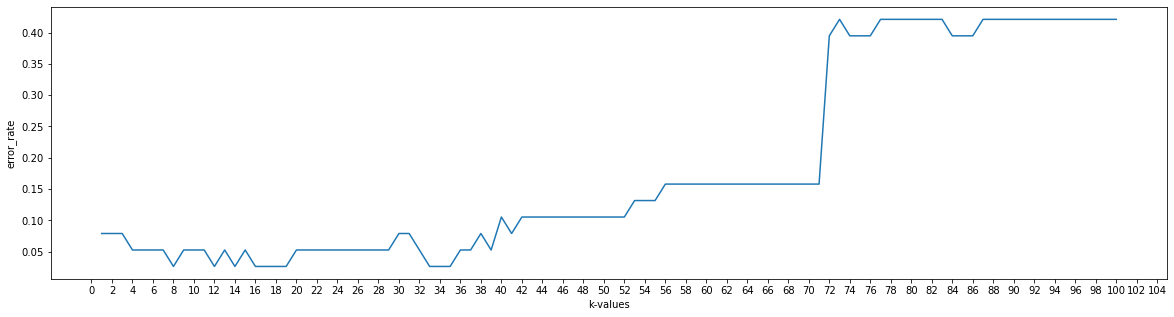

In [27]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
fig = plt.figure(figsize=(20, 5))
ax = plt.axes()

k_vals = []
error_rates = []
for i in range(1,101):
    n_neighbors, mis_match_count, err_rate = custom_knn(x_train, x_test, y_train, y_test, n_neighbors = i)
    k_vals.append(i)
    error_rates.append(err_rate)
ax.set_xlabel("k-values")
ax.set_ylabel("error_rate")
ax.xaxis.set_ticks(np.arange(0,105,2))
figure = ax.plot(k_vals, error_rates);

Above is the graph of error rates for values of n_neighbors ranging from 1 to 50 on the Iris dataset.<br>
We can observe that the least error rate is achieved multiple times when the n_neighbors is between and including 8 to 35.<br>
Once it crosses 35, the error rate increases exponentially.<br>

We can conclude that for the IRIS dataset, an optimum n_neighbor value is between 8 to 35 (precisely : 8,12,14,16-19,33-35) for random state 311

<h4>Plotting Error Rate for different K values on Ionosphere</h4>

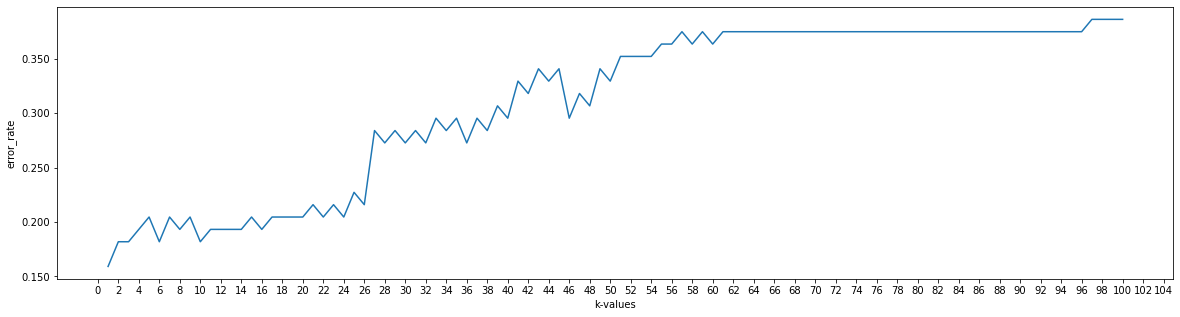

In [28]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20, 5))
ax = plt.axes()

k_vals = []
error_rates = []
for i in range(1,101):
    n_neighbors, mis_match_count, err_rate = custom_knn(xi_train, xi_test, yi_train, yi_test, n_neighbors = i)
    k_vals.append(i)
    error_rates.append(err_rate)
    
ax.set_xlabel("k-values")
ax.set_ylabel("error_rate")
ax.yaxis.set_ticks(np.arange(0,0.5,0.05))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.03f'))
ax.xaxis.set_ticks(np.arange(0,105,2))
figure = ax.plot(k_vals, error_rates);

Above is the graph of error rates for values of n_neighbors ranging from 1 to 100 on the Ionosphere dataset.
We can observe that the least error rate is acheived when n_neighbors is 1.
The error rate only keeps on increasing as we increase the number of n-neighbors

We can conclude that for the Ionosphere dataset, an optimum n_neighbor value 1 for random state 311

<h1>1-NN Implementation</h1><br>
Below you can find the code for 1NN for iris and ionosphere datasets.

In [29]:
def nn_calc_distance(test_sample, x_train):
    """
    Input
    train_sample : one of the test sample
    x_train : entire training set
    
    Returns: list
    a list of distances of each training sample from the test sample
    """
    import math
    distance =[]
    for train_sample in x_train:
        _distance = 0
        for i in range(len(test_sample)):
            _distance += (test_sample[i]-train_sample[i])**2
        distance.append(math.sqrt(_distance))
    return distance

In [30]:
def nn_find_index_min_distance(distance):
    """
    Input : distance
    It is a list of all distances from a test sample to every train sample
    
    Return : int
    returns the index of the training sample with minimum distance
    """
    _min = distance[0]
    min_index = 0
    for i in range(len(distance)):
        if distance[i] < _min:
            _min = distance[i]
            min_index = i
    return min_index

In [31]:
def one_nn(x_train, x_test, y_train, y_test):
    import sys
    import numpy as np
    predicted_labels = []
    y_pred = []
    nn_mis_match_count = 0
    for test_sample in x_test:
        distance = nn_calc_distance(test_sample, x_train)
        index_min_distance = nn_find_index_min_distance(distance)
        predicted_labels.append([test_sample,index_min_distance])
    for elem in predicted_labels:
        y_pred.append(y_train[elem[1]])
    for i in range(len(y_pred)):
        if y_pred[i] != y_test[i]:
            nn_mis_match_count += 1
    return (nn_mis_match_count, np.mean(y_pred != y_test))

In [32]:
start_1_iris= time.time()
nn_mis_match_count, error_rate = one_nn(x_train, x_test, y_train, y_test)
print("Iris\n")
print("Neighbors : 1\nNumber of mis matched labels : {} \nError Rate :{}\nPercentage of correct Predictions : {}".format(nn_mis_match_count,error_rate,(1-error_rate)*100))
print("total time : ",time.time()-start_1_iris)

Iris

Neighbors : 1
Number of mis matched labels : 3 
Error Rate :0.07894736842105263
Percentage of correct Predictions : 92.10526315789474
total time :  0.010802984237670898


In [33]:
import numpy as np
# Please replace the path of the ionosphere.txt 
ionosphere_path = "/path/to/file/ionosphere.txt"
features_ion = np.genfromtxt(ionosphere_path, delimiter = ",", usecols = np.arange(34))
labels_ion = np.genfromtxt(ionosphere_path, delimiter = ",", usecols = 34, dtype = 'int')

In [34]:
start_1_ion= time.time()
nn_mis_match_count, error_rate = one_nn(xi_train, xi_test, yi_train, yi_test)
print("Ionosphere\n")
print("Neighbors : 1\nNumber of mis matched labels : {} \nError Rate :{}\nPercentage of correct Predictions : {}".format(nn_mis_match_count,error_rate,(1-error_rate)*100))
print("total time : ",time.time()-start_1_ion)

Ionosphere

Neighbors : 1
Number of mis matched labels : 14 
Error Rate :0.1590909090909091
Percentage of correct Predictions : 84.0909090909091
total time :  0.34778809547424316


<h3>fin.</h3>